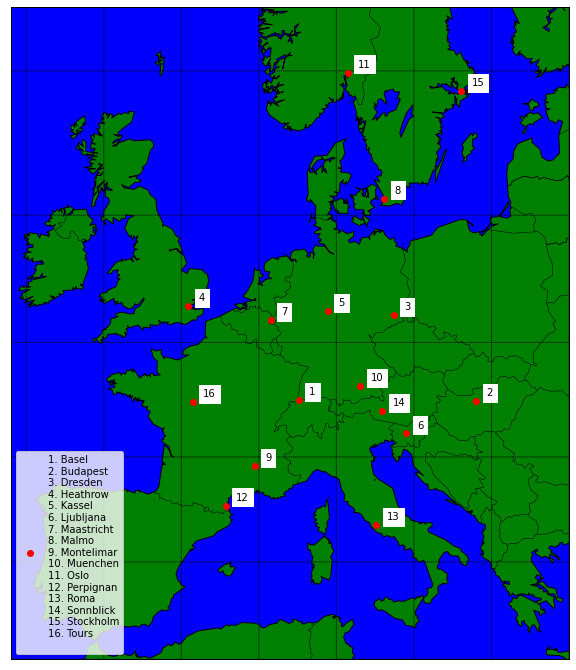

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas

def to_decimal_coords(old_coordinates):
    '''converts coordinates in the format degrees:minutes:seconds to decimal degrees'''
    components = old_coordinates.split(':')
    value=float(components[0])+(float(components[1])/60.0)+(float(components[2])/3600.0)
    return value

# load data
# we need to have columns called lat, lon and Name
df = pandas.read_csv("all_stations.csv")

# convert coordinates to decimal
df['decimal_lat']=df['lat'].apply(to_decimal_coords)
df['decimal_lon']=df['lon'].apply(to_decimal_coords)
df['Name']=df['Name'].str.strip()
df['Name']=df['Name'].str.split().str.get(0)
df.sort_values(by=['Name'],inplace=True)

# set the size
plt.rcParams["figure.figsize"] = (12,12)

# create a map of Europe
m = Basemap(llcrnrlon=-11.,llcrnrlat=35.,urcrnrlon=25.,urcrnrlat=62.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=45.,lon_0=0.,lat_ts=20.)

# draw coastlines and country boundaries
m.drawcoastlines()
m.drawcountries()

# fill in the land green and water blue
m.fillcontinents(color = 'green',lake_color='blue')
m.drawmapboundary(fill_color='blue')

# draw lat/lon grid lines every 5 degrees
m.drawmeridians(np.arange(0, 360, 5))
m.drawparallels(np.arange(-90, 90, 5))

x,y = m(df['decimal_lon'].tolist(),df['decimal_lat'].tolist())


# create a string with all the place names
name_label=[]
for name,idx in zip(df['Name'].tolist(),range(len(x))):
    name_label.append(str(idx+1) + ". " + name.capitalize() + "\n")

# plot filled circles at the locations of the cities.
m.plot(x,y,'ro',label=str(''.join(name_label)))

# plot the names of those five cities.
for name,xpt,ypt,idx in zip(df['Name'].tolist(),x,y,range(len(x))):
        plt.text(xpt+70000,ypt+35000,idx+1,backgroundcolor='white')



plt.legend(loc='lower left')
# not needed in a notebook?
#plt.show()